In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt




In [2]:
df = pd.read_csv('HAM10000_metadata.csv')
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [4]:
!ls


HAM10000_metadata.csv  HAM10000_metadata.csv:Zone.Identifier  project_eda.ipynb


In [ ]:
ISIC2018_Task3_Training_LesionGroupings

In [6]:
sample_image_path = "../raw_data/HAM10000_images_part_1/ISIC_0024306.jpg"

In [7]:
sample_image_path

'../raw_data/HAM10000_images_part_1/ISIC_0024306.jpg'

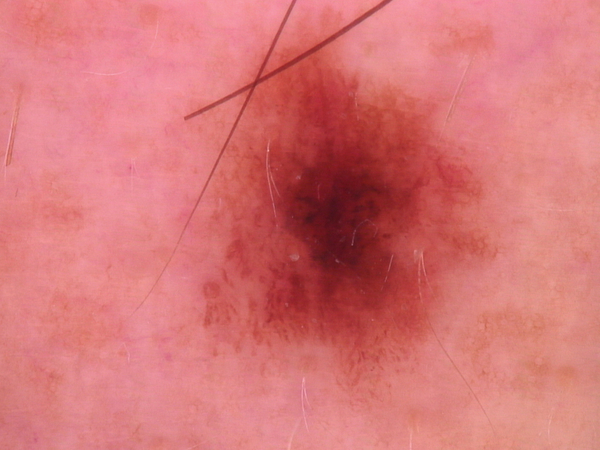

In [8]:
Image.open(sample_image_path)

In [9]:
#Vascular Lesions            		vasc 						
#Dermatofibroma               		df							
#Basal Cell Carcinoma         		bcc							
#Melanoma                     		mel						
#Melanocytic Nevi             		nv		   					
#Benign Keratosis             		bkl							
#Actinic Keratoses (AKIEC)   		akiec


In [10]:
metadata = pd.read_csv("HAM10000_metadata.csv")
label_map = {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}
metadata['label'] = metadata['dx'].map(label_map)
metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,0


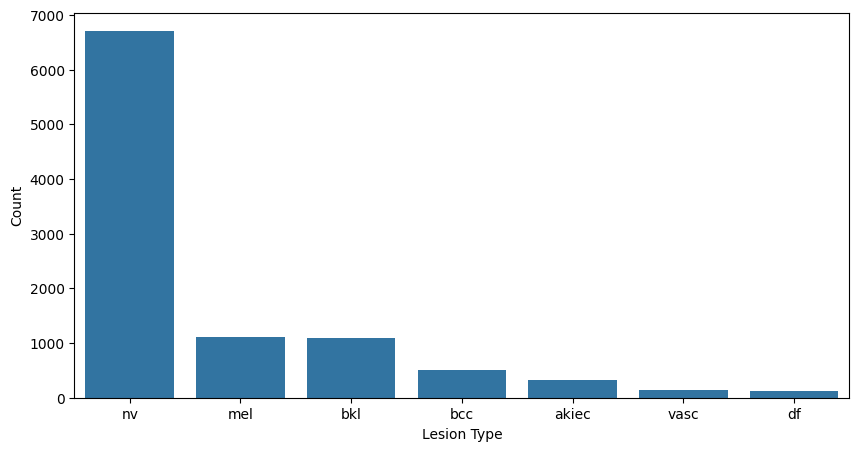

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(x='dx', data=metadata, order=metadata['dx'].value_counts().index)
plt.xlabel("Lesion Type")
plt.ylabel("Count")
plt.show()


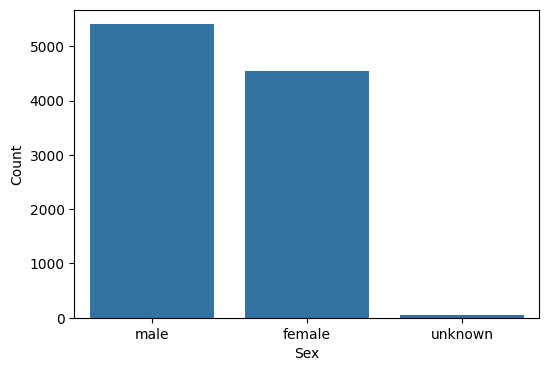

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=metadata)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


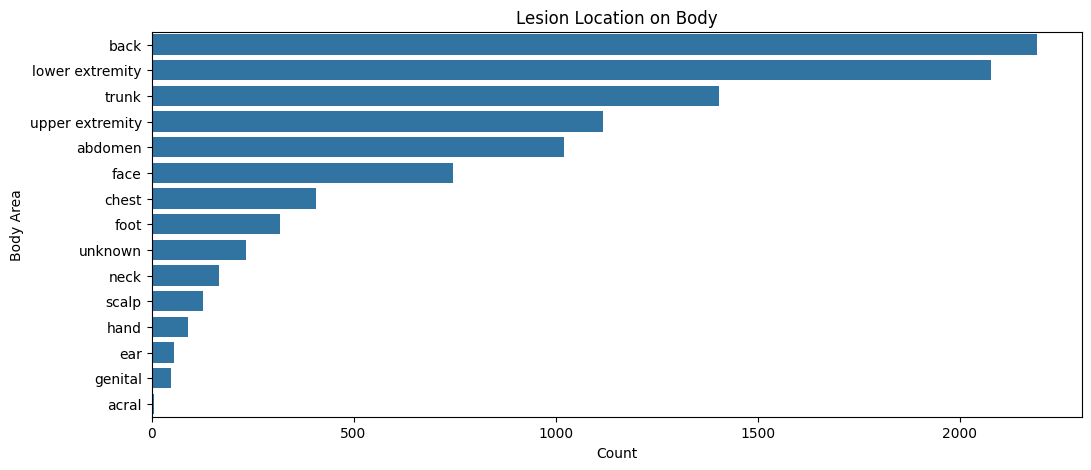

In [14]:
plt.figure(figsize=(12, 5))
sns.countplot(y='localization', data=metadata, order=metadata['localization'].value_counts().index)
plt.title("Lesion Location on Body")
plt.xlabel("Count")
plt.ylabel("Body Area")
plt.show()


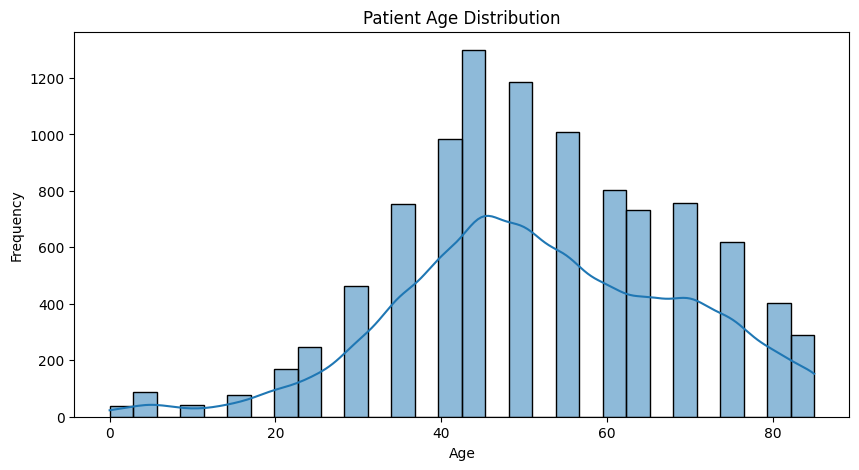

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(metadata['age'].dropna(), bins=30, kde=True)
plt.title("Patient Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


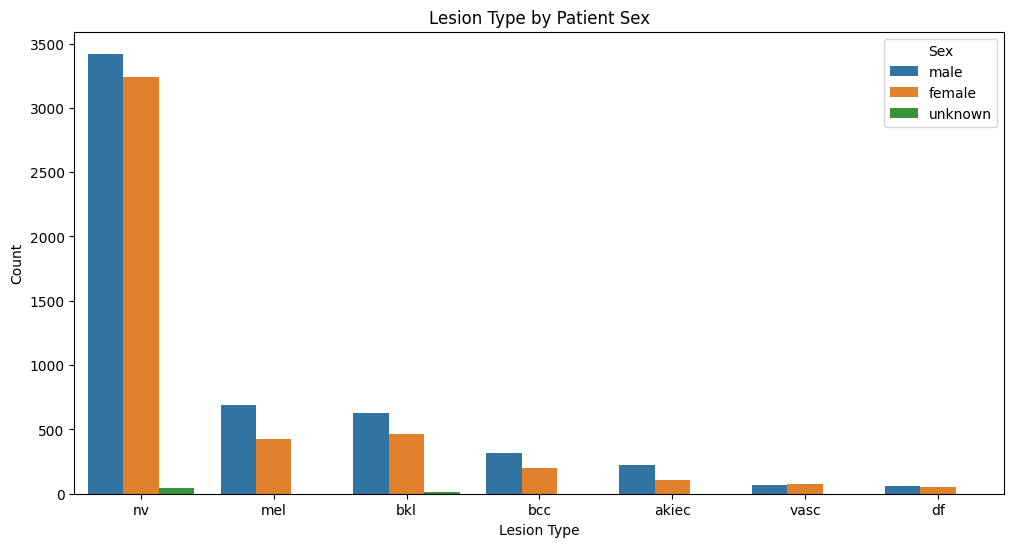

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='dx', hue='sex', data=metadata, order=metadata['dx'].value_counts().index)
plt.title("Lesion Type by Patient Sex")
plt.xlabel("Lesion Type")
plt.ylabel("Count")
plt.legend(title='Sex')
plt.show()


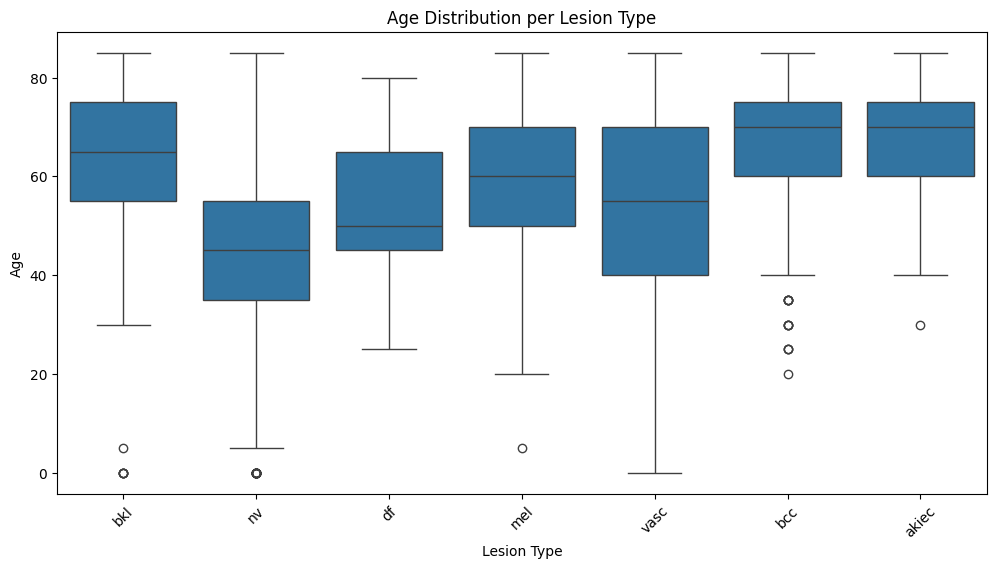

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='dx', y='age', data=metadata)
plt.title("Age Distribution per Lesion Type")
plt.xlabel("Lesion Type")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()


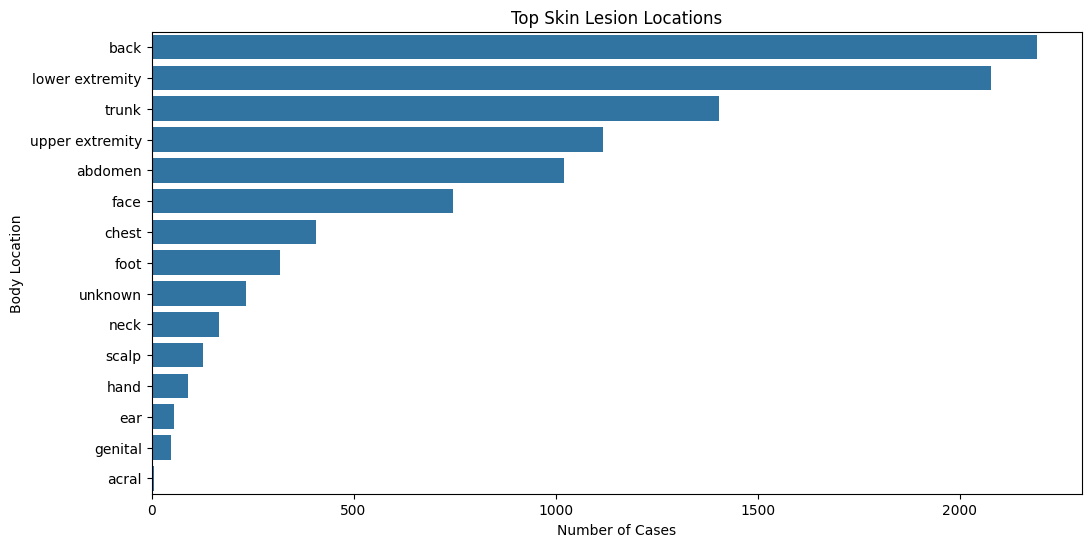

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(y='localization', data=metadata, order=metadata['localization'].value_counts().index)
plt.title("Top Skin Lesion Locations")
plt.xlabel("Number of Cases")
plt.ylabel("Body Location")
plt.show()


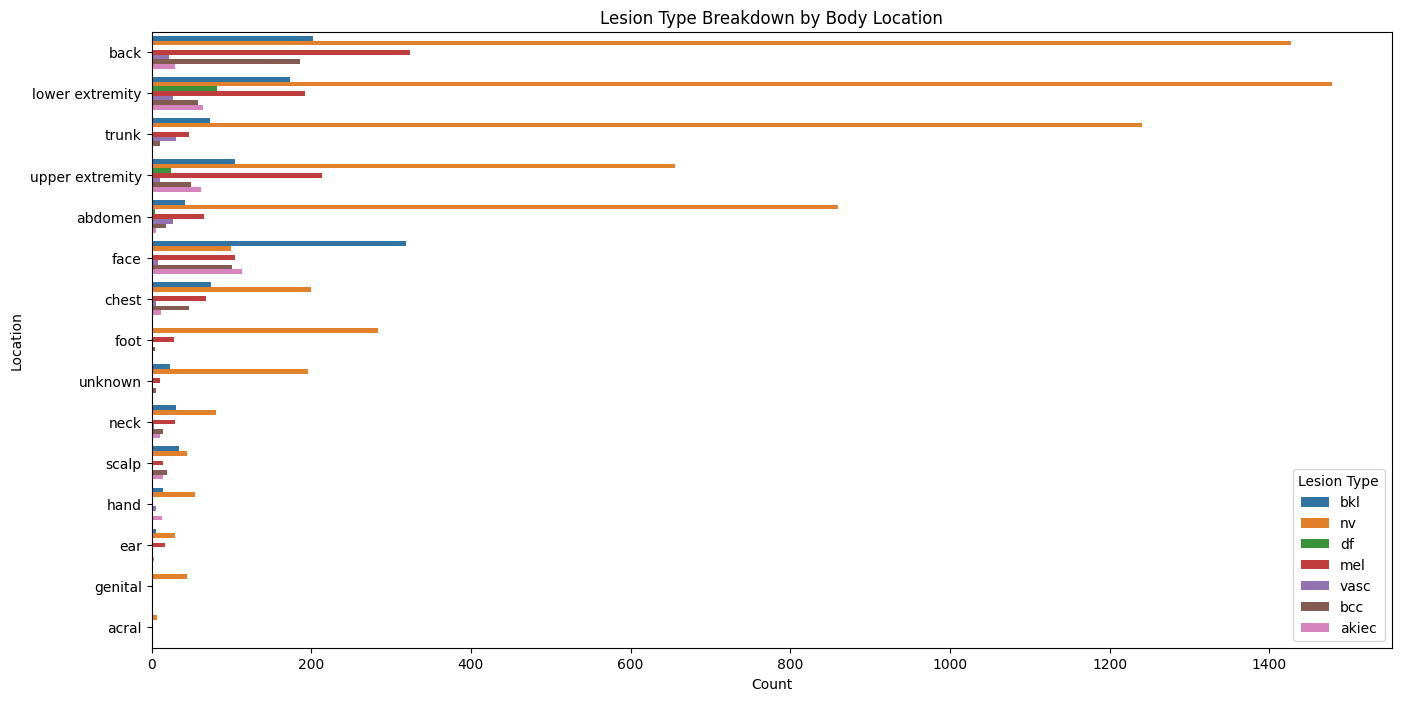

In [19]:
plt.figure(figsize=(16, 8))
sns.countplot(data=metadata, y="localization", hue="dx", order=metadata['localization'].value_counts().index)
plt.title("Lesion Type Breakdown by Body Location")
plt.xlabel("Count")
plt.ylabel("Location")
plt.legend(title='Lesion Type')
plt.show()


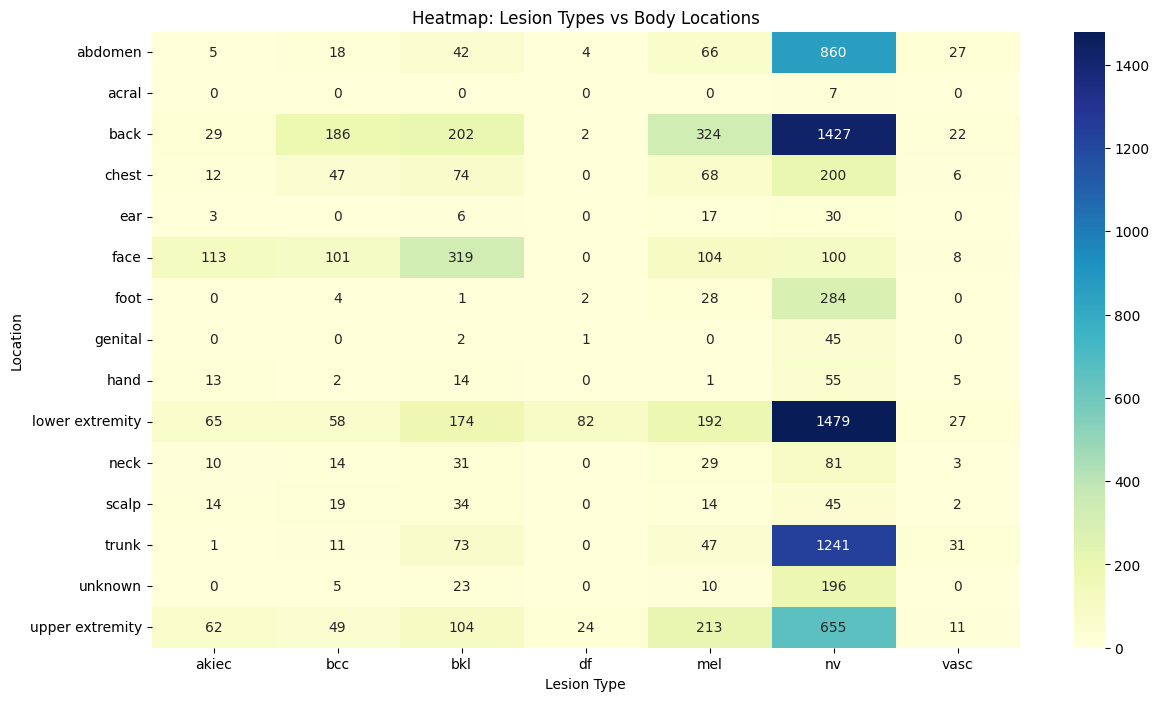

In [20]:
plt.figure(figsize=(14, 8))
cross_tab = pd.crosstab(metadata['localization'], metadata['dx'])
sns.heatmap(cross_tab, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Heatmap: Lesion Types vs Body Locations")
plt.xlabel("Lesion Type")
plt.ylabel("Location")
plt.show()


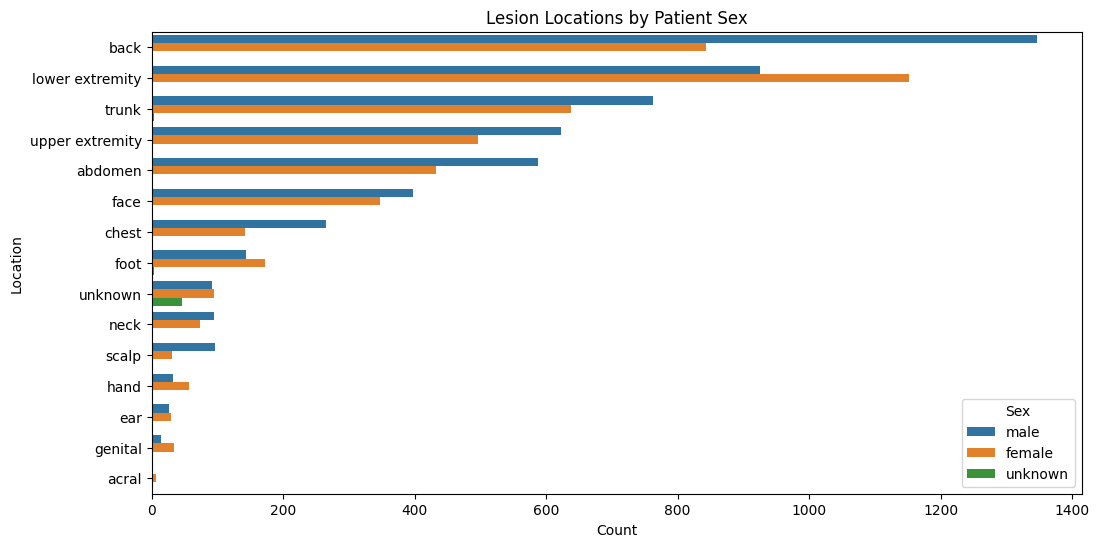

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=metadata, y="localization", hue="sex", order=metadata['localization'].value_counts().index)
plt.title("Lesion Locations by Patient Sex")
plt.xlabel("Count")
plt.ylabel("Location")
plt.legend(title='Sex')
plt.show()


In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Load metadata
metadata = pd.read_csv("HAM10000_metadata.csv")

# Choose the correct image folder
image_dirs = ["HAM10000_images_part_1", "HAM10000_images_part_2"]  # combine both parts


In [25]:
# How many images to display
n_images = 25
img_size = (64, 64)

# Create a plot
plt.figure(figsize=(15, 15))

# Loop through metadata and show valid images
count = 0
for i, row in metadata.iterrows():
    if count >= n_images:
        break

    img_file = row['image_id'] + ".jpg"
    label = row['dx']

    # Try loading from both folders
    for d in image_dirs:
        img_path = os.path.join(d, img_file)
        if os.path.exists(img_path):
            img = Image.open(img_path).resize(img_size)
            ax = plt.subplot(5, 5, count + 1)
            plt.imshow(img)
            plt.title(label)
            plt.axis("off")
            count += 1
            break  # found image, stop searching other folders

plt.tight_layout()
plt.show()


<Figure size 1500x1500 with 0 Axes>